Student Performance Prediction Model

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('student_performance.csv')
data.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85


In [3]:
data.drop(columns='Name',inplace=True)
data.drop(columns='Gender',inplace=True)
data.drop(columns='ParentalSupport',inplace=True)

In [4]:
data.head()

,StudentID,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade
0,1,85,15,78,1,80
1,2,90,20,85,2,87
2,3,78,10,65,0,68
3,4,92,25,90,3,92
4,5,88,18,82,2,85


In [5]:
x = data.iloc[:,:-1]
y = data[["FinalGrade"]]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.50)

In [8]:
len(x)

10

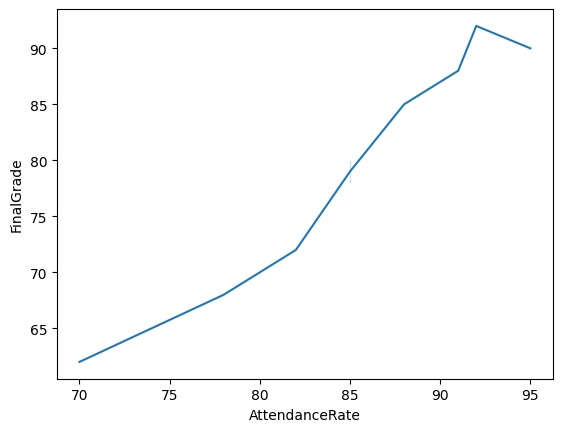

In [9]:
sns.lineplot(data=data,x="AttendanceRate",y="FinalGrade")
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [12]:
lr.score(x_train,y_train)*100

100.0

In [13]:
lr.score(x_test,y_test)*100

80.24056342042351

In [34]:
y_pred = lr.predict(x)

In [35]:
data.columns

Index(['StudentID', 'AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade',
       'ExtracurricularActivities', 'FinalGrade'],
      dtype='object')

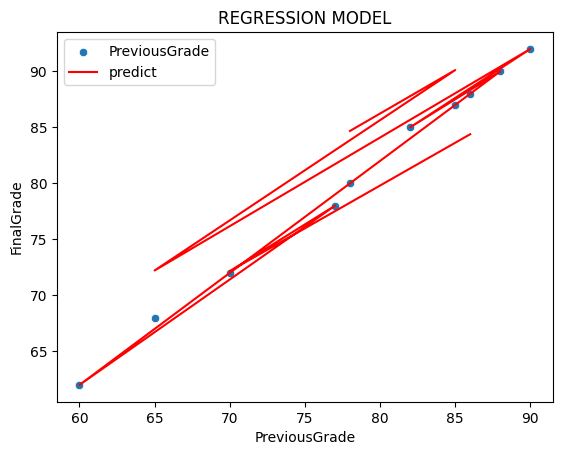

In [57]:
sns.scatterplot(x='PreviousGrade', y='FinalGrade', data= data)
plt.plot(data['PreviousGrade'],y_pred,c='red')
plt.legend(['PreviousGrade','predict'])
plt.title("REGRESSION MODEL")
plt.savefig("Student Regression Model.jpg")
plt.show()

LASSO

In [37]:
from sklearn.linear_model import Lasso

In [38]:
ls = Lasso()
ls.fit(x_train,y_train)

Lasso()

In [39]:
ls.score(x_test,y_test)*100

99.68354430379746

In [40]:
ls.score(x_train,y_train)*100

99.65940054495913

In [41]:
data.columns

Index(['StudentID', 'AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade',
       'ExtracurricularActivities', 'FinalGrade'],
      dtype='object')

In [19]:
{x.shape} and {y.shape}

{(10, 1)}

In [43]:
l_pred = ls.predict(x)

In [45]:
data.columns

Index(['StudentID', 'AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade',
       'ExtracurricularActivities', 'FinalGrade'],
      dtype='object')

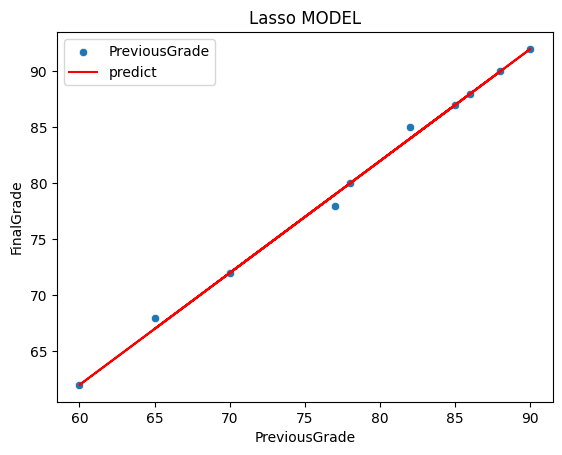

In [50]:
sns.scatterplot(x='PreviousGrade', y='FinalGrade', data= data)
plt.plot(data['PreviousGrade'],l_pred,c='red')
plt.legend(['PreviousGrade','predict'])
plt.title("Lasso MODEL")
plt.savefig("Student Lasso Model.jpg")
plt.show()

RIDGE

In [20]:
from sklearn.linear_model import Ridge

In [21]:
rd = Ridge()
rd.fit(x_train,y_train)

Ridge()

In [22]:
rd.score(x_train,y_train)*100

99.97985513649195

In [23]:
rd.score(x_test,y_test)*100

89.7178008050322

In [51]:
r_pred = rd.predict(x)

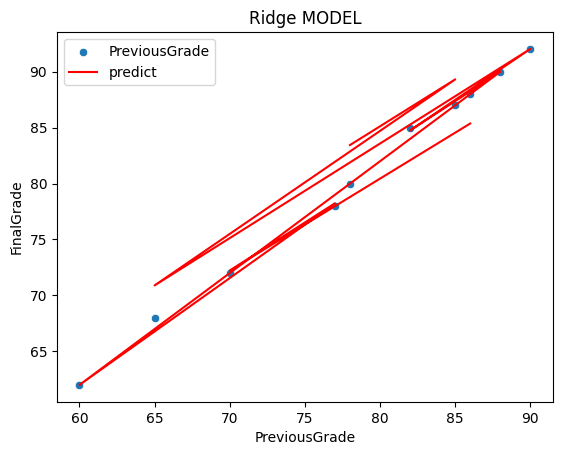

In [56]:
sns.scatterplot(x='PreviousGrade', y='FinalGrade', data= data)
plt.plot(data['PreviousGrade'],r_pred,c='red')
plt.legend(['PreviousGrade','predict'])
plt.title("Ridge MODEL")
plt.savefig("Student Ridge Model.jpg")
plt.show()